In [1]:
from Izh_net import *
from net_preparation import *
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from tqdm import tqdm
import numpy as np
from scipy.signal import correlate
from scipy.fft import fft

# Running procedure
def run(net, muscle, T, Iapp):
    net.set_init_conditions()
    muscle.set_init_conditions()
    dt = T[1] - T[0]
    N = len(net)
    U = np.zeros((len(T), N))
    V = np.zeros((len(T), N))
    Cn = np.zeros(len(T))
    X = np.zeros(len(T))
    F = np.zeros(len(T))
    for i, t in enumerate(T):
        U[i] = net.U_prev
        V[i] = net.V_prev
        Cn[i] = muscle.Cn_prev
        X[i] = muscle.x
        F[i] = muscle.F_prev
        net.step(dt=dt, Iapp=Iapp(t))
        u = net.output[0]
        muscle.step(dt=dt, u=u)
    return U, V, Cn, X, F

In [2]:
def calc_T(bursts):    
    dists = np.diff(bursts[:, 0])
    return np.mean(dists), np.std(dists)

def calc_duty(bursts):
    duty = bursts[:, 1] - bursts[:, 0]
    return np.mean(duty), np.std(duty)
    
def draw(T, net, V, Cn, X, F):
            # Visualization
        plt.figure(figsize=(7, 4))
        
        plt.subplot(211)
        for i in range(N):
            plt.plot(T, V[:, i], label=f"{net.names[i]}")
            firing_rastr = create_firing_rastr(V, T, 30)
            bursts = get_bursts_regions(find_bursts( firing_rastr[0], np.max(T)))
            print(calc_T(bursts)[0])
            print(calc_duty(bursts)[0])
            draw_bursts(bursts)
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.title(f'Average Membrane Potential of Neuron')
        plt.legend()
        

        
        plt.subplot(2, 2, 3)
        plt.plot(T, F, label="F", color='k')
        plt.plot(T, X, label="X", color='k', linestyle='-.')
        plt.xlabel('Time (ms)')
        plt.ylabel('Value')
        plt.legend()
        plt.subplot(224)
        plt.plot(T, Cn, label="C_e", color='r', linestyle='--')      
        plt.legend()
        plt.tight_layout()
        plt.show()
    
def draw_bursts(brusts):
    for x in brusts:
        plt.axvline(x = x[0], ymin=0, ymax=1, color='red', linewidth=1)
        plt.axvline(x = x[-1], ymin=0, ymax=1, color='blue', linewidth=1)
    return None

825.9806645182798
42.00466718524291


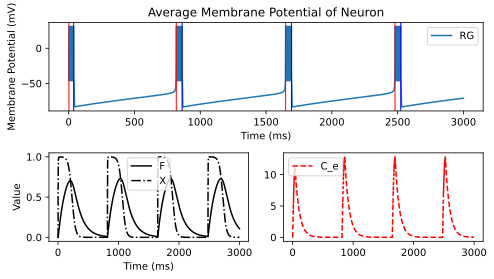

In [117]:
# Creating network
# Creating network
N = 1
A = np.array([0.002])
B = np.array([0.3])
C = np.array([-46])
D = np.array([1])
net = Izhikevich_Network(N=N, a=A, b=B, c=C, d=D)
net.names=["RG"]

# Limb settings
muscle = SimpleAdaptedMuscle(N=1, w=0.1)
    
I = np.zeros(N)
input = lambda t: I #+ np.random.normal(size=N)
# prepare simulations
T_max = 3000
time_scale = 3
T = np.linspace(0, T_max, T_max*time_scale)
dt = T[1]-T[0]

# Set the random seed for reproducibility
np.random.seed(2000)

U, V, Cn, X, F= run(net, muscle, T, input)
draw(T, net, V, Cn, X, F)

In [37]:
m=10 # num of iterations
A = np.array([0.001])
B = np.array([0.4])
C = np.array([-45])
D = np.array([2])
net.set_params(a=A, b=B, c=C, d=D)
A_vals=np.linspace(0.001, 0.008, m)
C_vals=np.linspace(-55, -40, m)
T_max = 2000
time_scale = 3
T = np.linspace(0, T_max, T_max*time_scale)
dt = T[1]-T[0]
Period = np.zeros(m)
P_std = np.zeros(m)
idx = 0
F_vals = np.zeros((m, len(T)))
for a_id, a in enumerate(A_vals):
        A[0] = a 
        net.set_params(a=A, b=B, c=C, d=D)
        print(f'a={a}')
        U, V, Cn, X, F= run(net, muscle, T, input)

        # calc sym properties
        firing_rastr = create_firing_rastr(V, T, 30)
        bursts = get_bursts_regions(find_bursts( firing_rastr[0], np.max(T)))
        Period[idx], P_std[idx] = calc_T(bursts)
        F_vals[idx] = F
        idx +=1
        #draw(T, net, V, Cn, X, F)

a=0.001
a=0.0017777777777777779
a=0.0025555555555555557
a=0.0033333333333333335
a=0.004111111111111111
a=0.004888888888888889
a=0.005666666666666667
a=0.0064444444444444445
a=0.007222222222222223
a=0.008


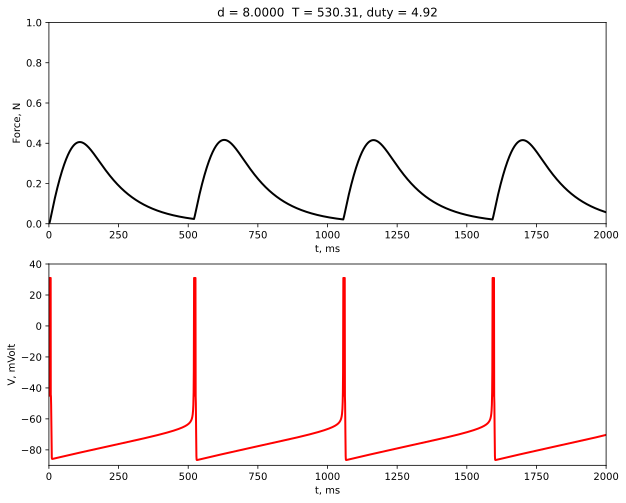

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
A = np.array([0.002])
B = np.array([0.4])
C = np.array([-45])
D = np.array([2])
net.set_params(a=A, b=B, c=C, d=D)
m = 100
A_vals=np.linspace(0.001, 0.008, m)
B_vals = np.linspace(0.26, 0.50, m)
C_vals=np.linspace(-55, -40, m)
D_vals=np.linspace(1, 8, m)
# Создадим фигуру и ось
fig, (ax, ay) = plt.subplots(2, 1, figsize=(10, 8))
ax.set_xlim(0, T_max)
ax.set_ylim(0, 1)
ay.set_xlim(0, T_max)
ay.set_ylim(-90, 40)
line1, = ax.plot([], [], lw=2)
line2, = ay.plot([], [], lw=2)
title1 = ax.set_title('')  # Инициализируем заголовок
title2 = ay.set_title('')  # Инициализируем заголовок
ax.set_xlabel('t, ms')
ax.set_ylabel('Force, N')
ay.set_xlabel('t, ms')
ay.set_ylabel('V, mVolt')
# Функция инициализации анимации
def init():
    line1.set_data([], [])
    line1.set_data([], [])
    title1.set_text('')  # Очищаем заголовок
    title2.set_text('')  # Очищаем заголовок
    return line1, line2, title1, title2

# Функция обновления кадра анимации
def update(frame):
    #A[0] = A_vals[frame] 
    #C[0] = C_vals[frame]
    #B[0]=B_vals[frame]
    D[0] = D_vals[frame]
    net.set_params(a=A,b=B,c=C, d=D)
    _, V, _, _, F= run(net, muscle, T, input)

    # calc sym properties
    firing_rastr = create_firing_rastr(V, T, 30)
    bursts = get_bursts_regions(find_bursts( firing_rastr[0], np.max(T)))
    Period, _ = calc_T(bursts)
    duty, _ = calc_duty(bursts)
    line2.set_data(T, V)
    line2.set_color('red')
    line1.set_data(T, F)
    line1.set_color('k')
    title1.set_text(f'd = {D_vals[frame] :.4f}  T = {Period:.2f}, duty = {duty:.2f}')  # Обновляем заголовок
    #title2.set_text(f'T = {Period:.2f}, duty = {duty:.2f}')  # Обновляем заголовок
    return line1, line2, title1, title2

# Создаем анимацию
ani = FuncAnimation(fig, update, frames=m, init_func=init, blit=True, interval=100)

# Сохраняем анимацию в GIF
#ani.save('img/force_d.gif', writer='pillow')

#plt.show()

In [108]:
D = np.array([2])
net.set_params(a=A, b=B, c=C, d=D)
m = 20
T_max = 10000
time_scale = 3
T = np.linspace(0, T_max, T_max*time_scale)
dt = T[1]-T[0]
A_vals=np.linspace(0.001, 0.008, m)
B_vals = np.linspace(0.27, 0.50, m)
C_vals=np.linspace(-55, -40, m)
labels = np.zeros((m, m, m))
Periods = np.zeros((m, m, m))
maskT = T>500

#threshold muscle force
Fth=0.25
a = 0.001
with tqdm(total=m**3) as pbar:
    for a_id, a in enumerate(A_vals):
        for b_id, b in enumerate(B_vals):
            for c_id, c in enumerate(C_vals):
                C[0] = c
                B[0] = b
                A[0] = a
                net.set_params(a=A,b=B,c=C)
                _, V, _, _, F = run(net, muscle, T, input)
                firing_rastr = create_firing_rastr(V, T, 30)
                bursts = get_bursts_regions(find_bursts(firing_rastr[0], T_max))
                Periods[a_id, b_id, c_id], _ = calc_T(bursts)
                labels[a_id, b_id, c_id] = 1 if np.min(F[maskT])<=Fth else 0
                pbar.update(1)

100%|█████████████████████████████████████| 8000/8000 [1:02:58<00:00,  2.12it/s]


In [111]:
direct='./mregs'
np.save(f'{direct}/labels.npy', labels)
np.save(f'{direct}/Periods.npy', Periods)
np.save(f'{direct}/A_vals.npy', A_vals)
np.save(f'{direct}/B_vals.npy', B_vals)
np.save(f'{direct}/C_vals.npy', C_vals)